<a href="https://colab.research.google.com/github/Venchislav/Data-Science/blob/main/StepikData1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize': (9, 6)})

In [3]:
events_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip')

In [4]:
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [5]:
events_data['action'].unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [6]:
events_data['date'] = pd.to_datetime(events_data['timestamp'], unit='s')

In [7]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [8]:
events_data.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

In [9]:
events_data['date'].max(), events_data['date'].min()

(Timestamp('2018-05-19 23:33:31'), Timestamp('2015-06-15 04:00:48'))

In [10]:
events_data['day'] = events_data['date'].dt.date

In [11]:
events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [12]:
events_data.groupby('day') \
  .user_id.nunique().head()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

<Axes: xlabel='day'>

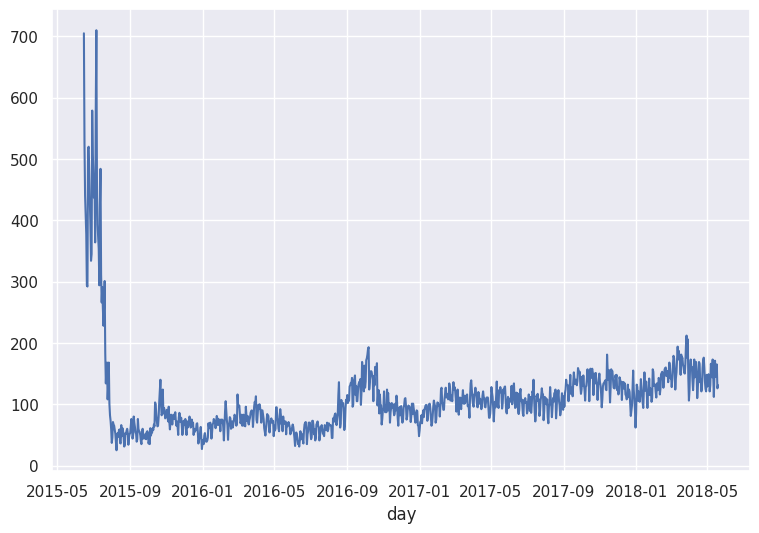

In [13]:
events_data.groupby('day') \
  .user_id.nunique().plot()

In [16]:
events_data[events_data['action'] == 'passed'].groupby('user_id', as_index=False).aggregate({'step_id': 'count'})\
  .rename(columns = {'step_id': 'steps_passed'})

,user_id,steps_passed
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84
...,...,...
17257,26789,2
17258,26790,8
17259,26794,69
17260,26797,10


<Axes: >

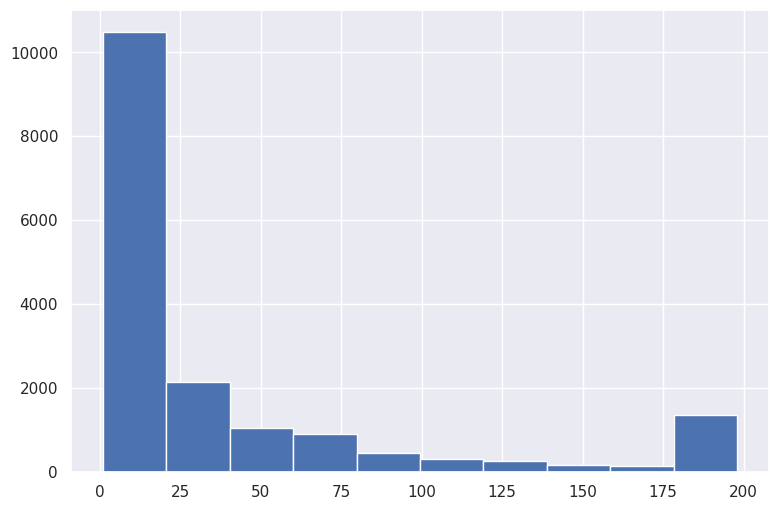

In [17]:
events_data[events_data['action'] == 'passed'].groupby('user_id', as_index=False).aggregate({'step_id': 'count'})\
  .rename(columns = {'step_id': 'steps_passed'}).steps_passed.hist()

In [22]:
# but it's a bad solution, as guys, who didn't pass any step will not be in our dataframe and histogram
# good solution with pivot table

events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0)

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1
...,...,...,...,...
26790,8,8,1,9
26793,1,0,1,1
26794,69,69,34,180


<Axes: >

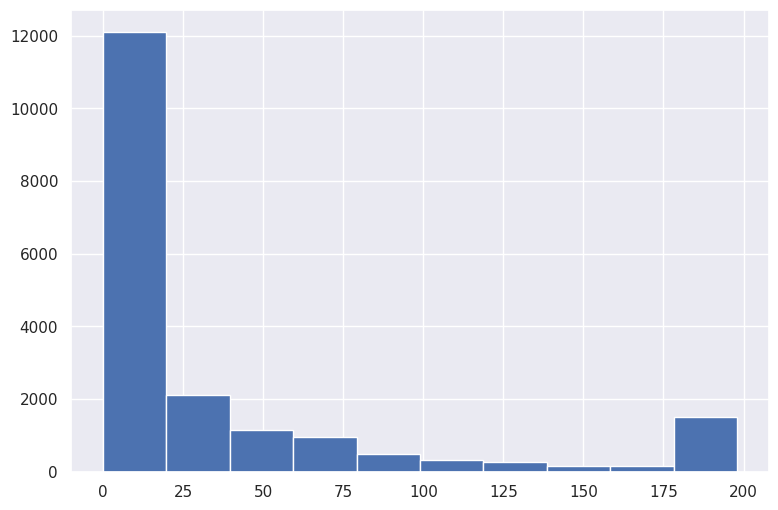

In [23]:
events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0).discovered.hist()

<Axes: >

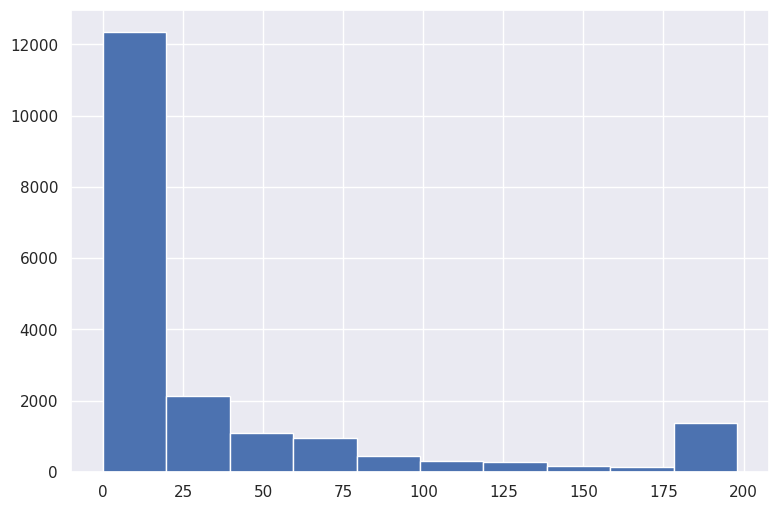

In [24]:
events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0).passed.hist()

<Axes: >

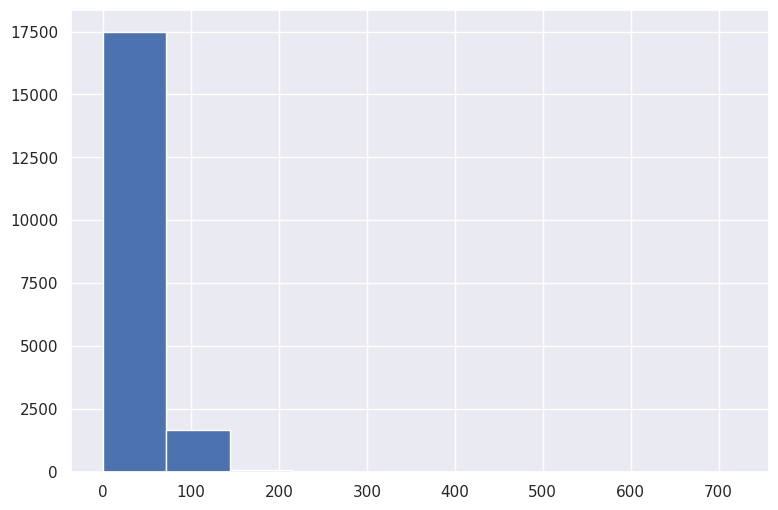

In [26]:
events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0).started_attempt.hist()